<a href="https://colab.research.google.com/github/mahapara2411/Capstone-2/blob/main/Sales_Prediction_OnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set()

In [ ]:
df = pd.read_excel("Retail_Dataset.xlsx", sheet_name = ["Year 2019-2020", "Year 2020-2021"])

In [ ]:
df1 = df["Year 2019-2020"]
df2 = df["Year 2020-2021"]

In [ ]:
data = df1.append(df2)

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2019-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2019-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2019-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2019-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2019-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [ ]:
# Check one-to-many mapping of some columns to check for data correctness

def isOneToMany(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    print(first == 1)

In [ ]:
# Check if each InvoiceNo is unique to a CustomerID
isOneToMany(data, 'Invoice', 'CustomerID')

False


In [ ]:
# Delete rows with missing CustomerID
data = data.drop(data[data.CustomerID.isnull()].index).reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644108 entries, 0 to 644107
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      644108 non-null  object        
 1   StockCode    644108 non-null  object        
 2   Description  644108 non-null  object        
 3   Quantity     644108 non-null  int64         
 4   InvoiceDate  644108 non-null  datetime64[ns]
 5   Price        644108 non-null  float64       
 6   CustomerID   644108 non-null  float64       
 7   Country      644108 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 39.3+ MB


In [ ]:
# Convert "InvoiceNo" to a string type series
data['Invoice'] = data.Invoice.astype('str')

In [ ]:
# Convert "Description" to a string type series and remove extra whitespaces
data['Description'] = data.Description.astype('str')
data['Description'] = data.Description.str.strip()

In [ ]:
# Check for data correctness based on one to many relationship between some columns

isOneToMany(data,'Invoice','Country')
isOneToMany(data,'StockCode','Description')

True
False


In [ ]:
# Check duplicacy of description in StockCode

products = data.groupby(['StockCode','Description'],as_index=False).count()
products = products.loc[:,['StockCode','Description']]
stockCount = products.StockCode.value_counts().to_frame()
stockList = list(stockCount[stockCount.StockCode>1].index) #List of stockCode with more than 1 Description
products[products.StockCode.isin(stockList)].head(10)

,StockCode,Description
17,16012,FOOD/DRINK SPONGE STICKERS
18,16012,FOOD/DRINK SPUNGE STICKERS
61,20615,BLUE POLKADOT PASSPORT COVER
62,20615,BLUE SPOTTY PASSPORT COVER
68,20622,VIP PASSPORT COVER
69,20622,VIPPASSPORT COVER
70,20652,BLUE POLKADOT LUGGAGE TAG
71,20652,BLUE SPOTTY LUGGAGE TAG
76,20658,RED RETROSPOT LUGGAGE TAG
77,20658,RED SPOTTY LUGGAGE TAG


In [ ]:
# Remove duplicate entries
products.drop_duplicates('StockCode', keep='first', inplace=True)

In [ ]:
# Correct the mapping of StockCode and Description

df = pd.merge(data,products,on='StockCode', how='left',validate='many_to_one')
df.drop('Description_x',axis=1,inplace=True)
df.rename(columns={'Description_y':'Description'},inplace=True)
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
0,489434,85048,12,2019-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,2019-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323W,12,2019-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS
3,489434,22041,48,2019-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,21232,24,2019-12-01 07:45:00,1.25,13085.0,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX


In [ ]:
# Check for StockCode and Description mapping
isOneToMany(df,'StockCode','Description')

True


In [ ]:
df[(df.StockCode.str.len())==6].sort_values(by='StockCode').head(10)

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
228738,526397,10123C,1,2020-10-11 13:31:00,0.65,17812.0,United Kingdom,HEARTS WRAPPING TAPE
12470,491622,10123C,1,2019-12-11 14:20:00,0.65,13415.0,United Kingdom,HEARTS WRAPPING TAPE
12465,491622,10123C,1,2019-12-11 14:20:00,0.65,13415.0,United Kingdom,HEARTS WRAPPING TAPE
39484,C497151,10123C,-6,2020-02-05 15:59:00,0.65,17412.0,United Kingdom,HEARTS WRAPPING TAPE
250208,528923,10123C,1,2020-10-25 14:41:00,0.65,14413.0,United Kingdom,HEARTS WRAPPING TAPE
228725,526397,10123C,1,2020-10-11 13:31:00,0.65,17812.0,United Kingdom,HEARTS WRAPPING TAPE
105754,507666,10123C,12,2020-05-10 17:09:00,0.65,12839.0,United Kingdom,HEARTS WRAPPING TAPE
183782,520564,10123C,5,2020-08-26 17:11:00,0.65,17402.0,United Kingdom,HEARTS WRAPPING TAPE
14163,491748,10123C,12,2019-12-14 11:30:00,0.65,17157.0,United Kingdom,HEARTS WRAPPING TAPE
152637,515687,10123C,1,2020-07-14 12:05:00,0.65,14896.0,United Kingdom,HEARTS WRAPPING TAPE


In [ ]:
df[(df.StockCode.str.len())<5].sort_values(by='StockCode').head(10)

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
501651,565197,C2,1,2021-09-01 16:16:00,50.0,13376.0,United Kingdom,CARRIAGE
474147,561257,C2,1,2021-07-26 12:00:00,50.0,14911.0,EIRE,CARRIAGE
440498,556206,C2,1,2021-06-09 13:46:00,50.0,14911.0,EIRE,CARRIAGE
504159,565457,C2,1,2021-09-05 09:07:00,50.0,14565.0,United Kingdom,CARRIAGE
377346,546509,C2,1,2021-03-14 12:15:00,50.0,14911.0,EIRE,CARRIAGE
377702,546541,C2,1,2021-03-14 15:11:00,50.0,14911.0,EIRE,CARRIAGE
618723,578331,C2,1,2021-11-24 08:44:00,50.0,14911.0,EIRE,CARRIAGE
446423,557136,C2,1,2021-06-17 09:23:00,50.0,14911.0,EIRE,CARRIAGE
618513,578314,C2,1,2021-11-23 16:33:00,50.0,13350.0,United Kingdom,CARRIAGE
306751,536540,C2,1,2020-12-01 14:05:00,50.0,14911.0,EIRE,CARRIAGE


In [ ]:
# Drop observations with incidental charges

df = df.drop(df[(df.StockCode.str.len())<5].index).reset_index(drop=True)

In [ ]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
count,641359,641359,641359.000000,641359,641359.000000,641359.000000,641359,641359
unique,35454,4590,NaN,32867,NaN,NaN,40,4553
top,576339,85123A,NaN,2021-11-14 15:27:00,NaN,NaN,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER
freq,540,4119,NaN,540,NaN,NaN,578495,4119
first,NaN,NaN,NaN,2019-12-01 07:45:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.566626,NaN,2.953604,15332.033349,NaN,NaN
std,NaN,NaN,211.923870,NaN,4.508677,1695.318169,NaN,NaN
min,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN,NaN
25%,NaN,NaN,2.000000,NaN,1.250000,13975.000000,NaN,NaN


In [ ]:
df['CustomerID'] = 'C' + df.CustomerID.astype('int').astype('str')
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
0,489434,85048,12,2019-12-01 07:45:00,6.95,C13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,2019-12-01 07:45:00,6.75,C13085,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323W,12,2019-12-01 07:45:00,6.75,C13085,United Kingdom,WHITE CHERRY LIGHTS
3,489434,22041,48,2019-12-01 07:45:00,2.10,C13085,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,21232,24,2019-12-01 07:45:00,1.25,C13085,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX


In [ ]:
# Check negative quanitities

df[(df.Quantity<1) & (~df.Invoice.str.startswith('C'))]

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description


In [ ]:
# Check for unit quantity of more than 4000
df[(abs(df.Quantity)>4000)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
3981,490018,21981,4320,2019-12-03 12:31:00,0.25,C17940,United Kingdom,PACK OF 12 WOODLAND TISSUES
3982,490018,21967,5184,2019-12-03 12:31:00,0.25,C17940,United Kingdom,PACK OF 12 SKULL TISSUES
3983,490018,21984,4008,2019-12-03 12:31:00,0.25,C17940,United Kingdom,PACK OF 12 PINK PAISLEY TISSUES
3984,490018,21980,4008,2019-12-03 12:31:00,0.25,C17940,United Kingdom,PACK OF 12 RED RETROSPOT TISSUES
28639,495194,16044,6144,2020-01-21 15:11:00,0.06,C13902,Denmark,POP-ART FLUORESCENT PENS
43519,497946,37410,19152,2020-02-15 11:57:00,0.10,C13902,Denmark,BLACK AND WHITE PAISLEY FLOWER MUG
43525,497946,47504E,4176,2020-02-15 11:57:00,0.15,C13902,Denmark,ENGLISH ROSE SCISSORS
43527,497946,47503E,6696,2020-02-15 11:57:00,0.15,C13902,Denmark,ASS FLORAL PRINT SCISSORS
43532,497946,20729,4200,2020-02-15 11:57:00,0.15,C13902,Denmark,RED SPOTTY CANDY BAG
43543,497946,20760,4320,2020-02-15 11:57:00,0.10,C13902,Denmark,GARDEN PATH POCKET BOOK


In [ ]:
df = df.drop(df[df.Quantity==12540].index).reset_index(drop=True)
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
0,489434,85048,12,2019-12-01 07:45:00,6.95,C13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,12,2019-12-01 07:45:00,6.75,C13085,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323W,12,2019-12-01 07:45:00,6.75,C13085,United Kingdom,WHITE CHERRY LIGHTS
3,489434,22041,48,2019-12-01 07:45:00,2.10,C13085,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,21232,24,2019-12-01 07:45:00,1.25,C13085,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX


In [ ]:
# Check one-to-many mapping between CustomerID and Country

isOneToMany(df, 'CustomerID', 'Country')

False


In [ ]:
# Add new column with bool value: 0 for not cancelled order, 1 for cancelled order
df['CancelledOrder'] = df.Invoice.str.startswith('C').astype('int')

In [ ]:
df.Country.value_counts()

United Kingdom          578494
Germany                  13332
EIRE                     12307
France                   10587
Netherlands               3747
Spain                     3038
Switzerland               2716
Belgium                   2333
Portugal                  1722
Australia                 1459
Italy                     1234
Channel Islands           1202
Norway                    1049
Sweden                    1017
Cyprus                     808
Finland                    772
Austria                    697
Denmark                    624
Greece                     482
Unspecified                461
Japan                      450
Poland                     415
USA                        415
United Arab Emirates       299
Iceland                    248
Singapore                  223
Israel                     220
Malta                      189
Lithuania                  153
RSA                        121
Canada                     118
Brazil                      94
Thailand

In [ ]:
# Delete the countries 'Unspecified' and 'European Community'
df = df.drop(df[df.Country.isin(['Unspecified','European Community'])].index).reset_index(drop=True)

In [ ]:
# Add new column 'InternationalOrders' with bool values, 0 for United Kingdom, and 1 for other countries
df['InternationalOrders'] = (df.Country!='United Kingdom').astype('int')

In [ ]:
# Add a column for total value for each product in each order
df['TotalPrice'] = df.Quantity*df.Price

In [ ]:
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,CancelledOrder,InternationalOrders,TotalPrice
0,489434,85048,12,2019-12-01 07:45:00,6.95,C13085,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0,0,83.4
1,489434,79323P,12,2019-12-01 07:45:00,6.75,C13085,United Kingdom,PINK CHERRY LIGHTS,0,0,81.0
2,489434,79323W,12,2019-12-01 07:45:00,6.75,C13085,United Kingdom,WHITE CHERRY LIGHTS,0,0,81.0
3,489434,22041,48,2019-12-01 07:45:00,2.10,C13085,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",0,0,100.8
4,489434,21232,24,2019-12-01 07:45:00,1.25,C13085,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX,0,0,30.0


In [ ]:
df.to_excel('Cleaned_data.xlsx')

In [ ]:
# Convert InvoiceDate to datetime object
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

# Truncate the minutes part of datetime object
df['InvoiceDate'] = df.InvoiceDate.dt.date

In [ ]:
# Confirm all cancelled orders have negative TotalPrice and Quantity

print(df[(df.Invoice.str.startswith('C')) & (df.TotalPrice>0)])
print(df[(df.Invoice.str.startswith('C')) & (df.Quantity>0)])

Empty DataFrame
Columns: [Invoice, StockCode, Quantity, InvoiceDate, Price, CustomerID, Country, Description, CancelledOrder, InternationalOrders, TotalPrice]
Index: []
Empty DataFrame
Columns: [Invoice, StockCode, Quantity, InvoiceDate, Price, CustomerID, Country, Description, CancelledOrder, InternationalOrders, TotalPrice]
Index: []


In [ ]:
df.drop(['Invoice', 'CustomerID','Country','InternationalOrders','Description','CancelledOrder','Price'],
            axis=1,inplace=True)

In [ ]:
df.head()

,StockCode,Quantity,InvoiceDate,TotalPrice
0,85048,12,2019-12-01,83.4
1,79323P,12,2019-12-01,81.0
2,79323W,12,2019-12-01,81.0
3,22041,48,2019-12-01,100.8
4,21232,24,2019-12-01,30.0


In [ ]:
df = df.groupby(['InvoiceDate','StockCode'],as_index=False).sum()
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

In [ ]:
df['Year'] = df.InvoiceDate.dt.year
df['Quarter'] = df.InvoiceDate.dt.quarter
df['Month'] = df.InvoiceDate.dt.month
df['Week'] = df.InvoiceDate.dt.week
df['Weekday'] = df.InvoiceDate.dt.weekday
df['Day'] = df.InvoiceDate.dt.day
df['Dayofyear'] = df.InvoiceDate.dt.dayofyear
df['UnitPrice'] = df.TotalPrice/df.Quantity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
df.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
0,2019-12-01,10002,12,10.20,2019,4,12,48,6,1,335,0.85
1,2019-12-01,10125,4,3.40,2019,4,12,48,6,1,335,0.85
2,2019-12-01,10133,6,5.10,2019,4,12,48,6,1,335,0.85
3,2019-12-01,10135,7,8.75,2019,4,12,48,6,1,335,1.25
4,2019-12-01,15036,7,4.55,2019,4,12,48,6,1,335,0.65


In [ ]:
df.describe()

,Quantity,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,UnitPrice
count,375558.000000,375558.000000,375558.000000,375558.000000,375558.000000,375558.000000,375558.000000,375558.000000,375558.000000,3.746180e+05
mean,21.414051,34.733435,2020.453211,2.720011,7.182156,29.404231,2.804672,15.411540,203.095714,NaN
std,114.410654,121.736601,0.559407,1.129000,3.407218,14.742318,2.123650,8.643833,103.124836,NaN
min,-18189.000000,-3825.360000,2019.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,-inf
25%,2.000000,5.950000,2020.000000,2.000000,4.000000,17.000000,1.000000,8.000000,113.000000,1.250000e+00
50%,8.000000,15.000000,2020.000000,3.000000,8.000000,31.000000,2.000000,15.000000,216.000000,1.713117e+00
75%,20.000000,30.600000,2021.000000,4.000000,10.000000,43.000000,5.000000,23.000000,296.000000,3.750000e+00
max,19152.000000,39619.500000,2021.000000,4.000000,12.000000,52.000000,6.000000,31.000000,358.000000,inf


In [ ]:
# Drop rows with negative Quantity

df = df.drop(df[df.Quantity<=0].index).reset_index(drop=True)
df = df.drop(df[df.TotalPrice<=0].index).reset_index(drop=True)

# Removing outliers in Quantity and TotalPrice
df = df[(np.abs(stats.zscore(df.Quantity)) < 3)]
df = df[(np.abs(stats.zscore(df.TotalPrice)) < 3)]

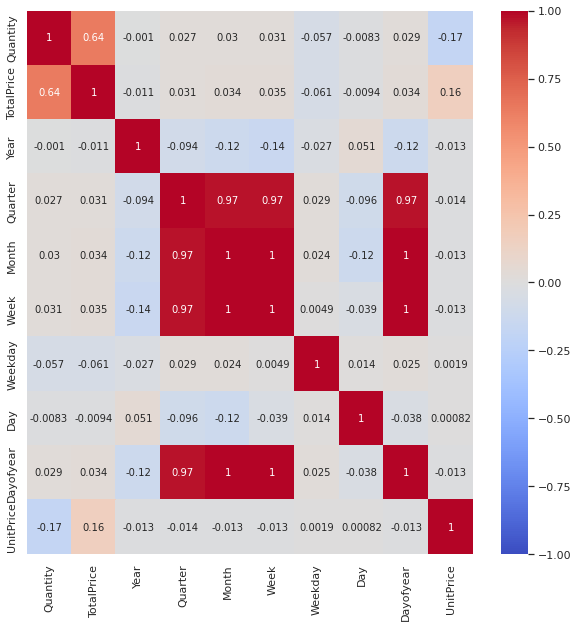

In [ ]:
# Get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# Plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1,center=0)

In [ ]:
df.drop(['Month', 'Quarter','Dayofyear','Year'], axis=1,inplace=True)

In [ ]:
df.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2019-12-01,10002,12,10.20,48,6,1,0.85
1,2019-12-01,10125,4,3.40,48,6,1,0.85
2,2019-12-01,10133,6,5.10,48,6,1,0.85
3,2019-12-01,10135,7,8.75,48,6,1,1.25
4,2019-12-01,15036,7,4.55,48,6,1,0.65


In [ ]:
df.to_excel('orders_cleaned.xlsx')

**Test-Train Split**

In [ ]:
# Split the dataset into train and test dataset

df_train = df[df.InvoiceDate<'2021-11-01']
df_test = df[df.InvoiceDate>='2021-11-01']

In [ ]:
df_train.head()

,InvoiceDate,StockCode,Quantity,TotalPrice,Week,Weekday,Day,UnitPrice
0,2019-12-01,10002,12,10.20,48,6,1,0.85
1,2019-12-01,10125,4,3.40,48,6,1,0.85
2,2019-12-01,10133,6,5.10,48,6,1,0.85
3,2019-12-01,10135,7,8.75,48,6,1,1.25
4,2019-12-01,15036,7,4.55,48,6,1,0.65


In [ ]:
# Define the feature and target variables

X_train = df_train.drop(labels=['InvoiceDate','StockCode','Quantity','TotalPrice'],axis=1)
y_train = df_train.Quantity

X_test = df_test.drop(labels=['InvoiceDate','StockCode','Quantity','TotalPrice'],axis=1)
y_test = df_test.Quantity

In [ ]:
# Data Frame to store all the RMSE scores for various algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSE'] = None
algo_score['Test RMSE'] = None
algo_score['Hyperparameters'] = None
algo_score['Training+Test Time(sec)'] = None

cv_time = []

# Dataframes for second level of predictions. Collect the predicted y values for training and test set of data
ypred_train = pd.DataFrame(index = X_train.index)
ypred_test = pd.DataFrame(index = X_test.index)

ypred_train['quantity'], ypred_test['quantity'] = y_train, y_test

In [ ]:
from sklearn.metrics import make_scorer

# Metric used to measure the model (Root Mean Square Error)
def rmse(y_actual, y_pred):
    rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
    return rmse
rmse_cv = make_scorer(rmse, greater_is_better=False)

In [ ]:
# Plots True vs. Predicted count values
def plot_true_vs_pred (y_actual, y_pred):
    fig = plt.figure(figsize=(18, 16))
    
    pred_val = pd.DataFrame({'actual':y_actual,'predicted':y_pred})
    pred_val['error']=abs(pred_val.actual-pred_val.predicted)
    sns.swarmplot(pred_val.actual.round(0),pred_val.error)
    
    plt.show()

In [ ]:
# Function to predict on train and test data and return the required metrics
def model_fit(model, X_train, y_train, X_test, y_test):
    ''' 
    Input:
        model = model to be applied
        X_train y_train = Training data
        X_test, y_test = Testing data
    Output:
        rmse for training and test data 
        predicted y for training and test data
    
    '''
#     model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    rmse_train = rmse(y_train, y_train_predict)
    rmse_test = rmse(y_test, y_test_predict)
    
    rmse_all = [rmse_train, rmse_test]
    y_pred_all = [y_train_predict, y_test_predict]
    
    return(rmse_all, y_pred_all)

In [ ]:
from sklearn.model_selection import cross_val_predict
def cross_val(model, X_train, y_train, cv=5):
#     y_pred = pd.Series(index=y_train.index)
    y_pred = cross_val_predict(model,X_train,y_train,cv=5)

    rmse_train = rmse(y_train,y_pred)
    return(rmse_train, y_pred)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

param_summary = ['','']

%time reg.fit(X_train, y_train)
%time rmse_summary, y_predict_summary = model_fit(reg, X_train, y_train, X_test, y_test)

ypred_test['LR'] = y_predict_summary[1]  
ypred_train['LR'] = y_predict_summary[0]

algo_score.loc['Linear Regression'] = rmse_summary+param_summary

CPU times: user 39.6 ms, sys: 3.98 ms, total: 43.6 ms
Wall time: 59 ms
CPU times: user 16.3 ms, sys: 8 ms, total: 24.3 ms
Wall time: 14.9 ms


In [ ]:
algo_score.loc['Linear Regression', 'Training+Test Time(sec)'] = 0.516
cv_time.append(0.516)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,28.313427,28.364165,,0.516


In [ ]:
# Features and the Estimated Linear Regression Coefficients
df_coeff = pd.DataFrame({'features': X_train.columns, 'Lin_Coeff': reg.coef_})

**Regularization Model - Ridge**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

CPU times: user 2.41 s, sys: 2.16 s, total: 4.57 s
Wall time: 2.45 s
Best alpha for Ridge Regression Model: {'alpha': 100}


In [ ]:
# Fine tune Hyperparameter for edge cases
param_grid = {'alpha': np.arange(75,150,10)}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

CPU times: user 2.06 s, sys: 1.71 s, total: 3.77 s
Wall time: 1.98 s
Best alpha for Ridge Regression Model: {'alpha': 145}


In [ ]:
param_summary = [ridge.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(ridge, X_train, y_train, X_test, y_test)

ypred_test['Ridge'] = y_predict_summary[1]  
ypred_train['Ridge'] = y_predict_summary[0]

algo_score.loc['Ridge Regression'] = rmse_summary+param_summary

CPU times: user 19.3 ms, sys: 14 ms, total: 33.3 ms
Wall time: 18.5 ms


In [ ]:
algo_score.loc['Ridge Regression', 'Training+Test Time(sec)'] = 6.917
cv_time.append(6.917)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,28.313427,28.364165,,0.516
Ridge Regression,28.313427,28.364170,{'alpha': 145},6.917


In [ ]:
# Features and the Estimated Ridge Regression Coefficients
df_coeff['Ridge_Coeff'] = ridge.best_estimator_.coef_

**Regularization Model - Lasso**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

CPU times: user 3.17 s, sys: 2.31 s, total: 5.48 s
Wall time: 2.86 s
Best alpha for Lasso Regression Model: {'alpha': 0.5}


In [ ]:
# Fine tune Hyperparameter for edge case

param_grid = {'alpha': np.arange(.01,.25,.01)}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

CPU times: user 8.06 s, sys: 5.72 s, total: 13.8 s
Wall time: 7.15 s
Best alpha for Lasso Regression Model: {'alpha': 0.24000000000000002}


In [ ]:
param_summary = [lasso.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(lasso, X_train, y_train, X_test, y_test)
ypred_test['Lasso'] = y_predict_summary[1]
ypred_train['Lasso'] = y_predict_summary[0]

algo_score.loc['Lasso Regression'] = rmse_summary+param_summary

CPU times: user 20.2 ms, sys: 12 ms, total: 32.2 ms
Wall time: 16.2 ms


In [ ]:
algo_score.loc['Lasso Regression', 'Training+Test Time(sec)'] = 31.328
cv_time.append(31.328)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,28.313427,28.364165,,0.516
Ridge Regression,28.313427,28.364170,{'alpha': 145},6.917
Lasso Regression,28.313722,28.366796,{'alpha': 0.24000000000000002},31.328


In [ ]:
# Features and the Estimated Lasso Regression Coefficients
df_coeff['Lasso_Coeff'] = lasso.best_estimator_.coef_

**Plotting the coefficients obtained from Linear, Ridge and Lasso regression**

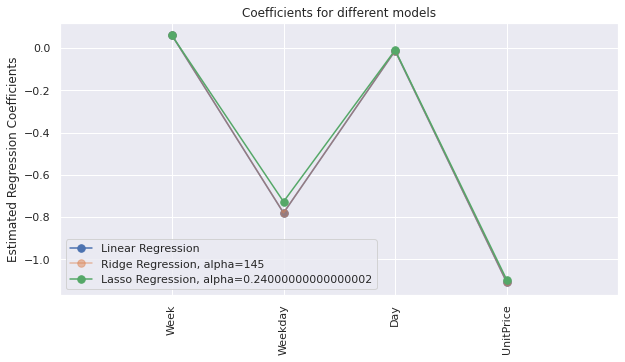

In [ ]:
fig = plt.figure(figsize=(10, 5))

axes = fig.add_subplot(1, 1, 1)
axes.plot(df_coeff.Lin_Coeff, label='Linear Regression', marker='.', markersize=15)
axes.plot(df_coeff.Ridge_Coeff, label='Ridge Regression, alpha={}'.format(ridge.best_params_['alpha']), alpha=.5,marker='.', markersize=15)
axes.plot(df_coeff.Lasso_Coeff, label='Lasso Regression, alpha={}'.format(lasso.best_params_['alpha']), marker='.', markersize=15)

plt.xticks(range(len(df_coeff.Lin_Coeff)), df_coeff.features, rotation=90)
axes.set(ylabel='Estimated Regression Coefficients', title='Coefficients for different models')
axes.set(xlim=[-1, len(df_coeff.Lin_Coeff)])
axes.legend()

**Ensemble Model - Random Forest**

In [ ]:
# Random Forest Regression Hyperparameter tuning using Grid Search to obtain the best parameters. 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# The code for hyperparameter tuning is commented out as it takes a long time to run 

# Tuning the hyperparameters

param_distributions = {'n_estimators': [50,500,1000], 'max_features':['auto'], 'min_samples_leaf':[1,10,50],'n_jobs':[-1]}
rf_main = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 50,cv=5, 
                             scoring=rmse_cv)
%time rf_main.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50, n_jobs=-1; total time=  17.5s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50, n_jobs=-1; total time=  16.5s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50, n_jobs=-1; total time=  16.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50, n_jobs=-1; total time=  16.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50, n_jobs=-1; total time=  16.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500, n_jobs=-1; total time= 2.7min
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500, n_jobs=-1; total time= 2.7min
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500, n_jobs=-1; total time= 2.7min
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500, n_jobs=-1; total time= 2.7min
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500, n_jobs=-1; total time= 2.7min
[CV] END max_features=auto, min_samples_leaf=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50,
                   param_distributions={'max_features': ['auto'],
                                        'min_samples_leaf': [1, 10, 50],
                                        'n_estimators': [50, 500, 1000],
                                        'n_jobs': [-1]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [ ]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_main.best_params_))

Best parameters for Random Forest Regression Model: {'n_jobs': -1, 'n_estimators': 1000, 'min_samples_leaf': 50, 'max_features': 'auto'}


In [ ]:
param_summary = [rf_main.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(rf_main, X_train, y_train, X_test, y_test)
ypred_test['RF'] = y_predict_summary[1]
ypred_train['RF'] = y_predict_summary[0]

algo_score.loc['Random Forest'] = rmse_summary+param_summary

CPU times: user 55.7 s, sys: 439 ms, total: 56.1 s
Wall time: 29 s


In [ ]:
algo_score.loc['Random Forest', 'Training+Test Time(sec)'] = 6706
cv_time.append(6706)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,28.313427,28.364165,,0.516
Ridge Regression,28.313427,28.364170,{'alpha': 145},6.917
Lasso Regression,28.313722,28.366796,{'alpha': 0.24000000000000002},31.328
Random Forest,21.222628,24.849052,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",6706


**Visualize the mean score against different values for n estimators**

In [ ]:
rf_result=pd.DataFrame(rf_main.cv_results_)
rf_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_jobs,param_n_estimators,param_min_samples_leaf,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.115741,0.500136,0.429186,0.039367,-1,50,1,auto,"{'n_jobs': -1, 'n_estimators': 50, 'min_sample...",-24.114296,-22.586157,-23.731975,-22.135775,-26.943180,-23.902277,1.683671,9
1,158.024104,1.035680,3.899293,0.113085,-1,500,1,auto,"{'n_jobs': -1, 'n_estimators': 500, 'min_sampl...",-24.040499,-22.485860,-23.665355,-22.042866,-26.399073,-23.726730,1.524388,7
2,317.980251,2.401677,7.930267,0.776676,-1,1000,1,auto,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",-24.031286,-22.483650,-23.676621,-22.065838,-26.377307,-23.726940,1.511597,8
3,14.184990,0.167416,0.388980,0.039323,-1,50,10,auto,"{'n_jobs': -1, 'n_estimators': 50, 'min_sample...",-23.785406,-22.206573,-22.997690,-21.044481,-25.449361,-23.096702,1.484794,6
4,144.234689,3.442718,3.275600,0.150501,-1,500,10,auto,"{'n_jobs': -1, 'n_estimators': 500, 'min_sampl...",-23.787980,-22.167671,-22.999267,-20.919804,-25.387177,-23.052380,1.505045,5
5,302.740549,11.316781,6.583944,0.346348,-1,1000,10,auto,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",-23.794831,-22.167593,-23.000139,-20.904967,-25.377473,-23.049000,1.506930,4
6,14.647051,0.293119,0.307875,0.000450,-1,50,50,auto,"{'n_jobs': -1, 'n_estimators': 50, 'min_sample...",-23.605714,-22.150502,-22.669932,-20.741283,-24.920688,-22.817624,1.401572,3
7,139.999133,1.894977,2.755118,0.134586,-1,500,50,auto,"{'n_jobs': -1, 'n_estimators': 500, 'min_sampl...",-23.603053,-22.108437,-22.676312,-20.711014,-24.875924,-22.794948,1.400832,2
8,274.133594,1.949401,5.279900,0.224031,-1,1000,50,auto,"{'n_jobs': -1, 'n_estimators': 1000, 'min_samp...",-23.601073,-22.105877,-22.678056,-20.714885,-24.868135,-22.793605,1.397360,1


In [ ]:
est_score = rf_result.groupby('param_n_estimators')['mean_test_score'].mean()
est_score

param_n_estimators
50     -23.272201
500    -23.191353
1000   -23.189849
Name: mean_test_score, dtype: float64

[Text(0, 0.5, 'Mean CV Test Score'),
 Text(0.5, 0, 'n_estimators'),
 Text(0.5, 1.0, 'n_estimators vs. Score (best_n_estimator = 500)')]

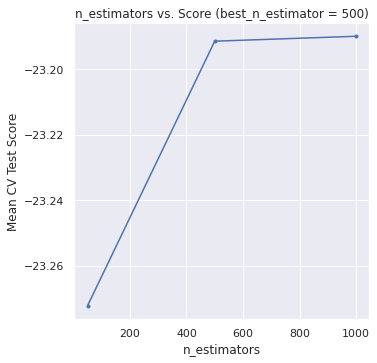

In [ ]:
fig=plt.figure(figsize=(18, 12))

axes=fig.add_subplot(2, 3, 1)
axes.plot(est_score.index, est_score.values, marker='.')
axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 500)')

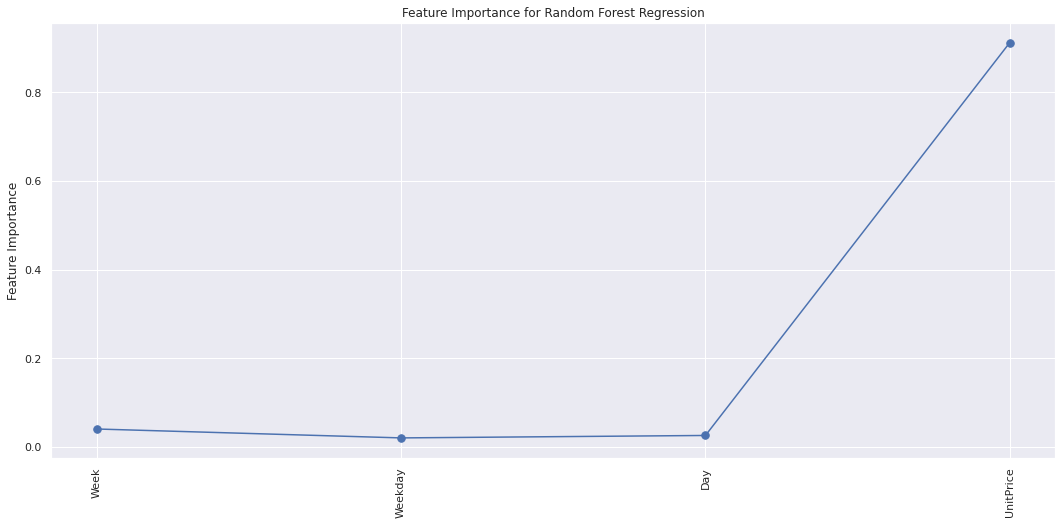

In [ ]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_main.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_main.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression')

plt.show()

**Ensemble Method - Gradient Boost**

In [ ]:
# The code for hyperparameter tuning is commented out as it takes a long time to run 

# Tuning the hyperparameters

#from sklearn.ensemble import GradientBoostingRegressor

#aram_distributions = {'n_estimators': [50,100,500,1000], 'learning_rate':[0.01, 0.05, 0.1],'max_features':['auto'], 'min_samples_leaf':[1, 3, 7, 10], 'min_samples_split':[2,5,10]}
#grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
#grad_boost.fit(X_train, y_train)

In [ ]:
#print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

In [ ]:
# Following code uses the best parameters generated above to fit the model

#from sklearn.ensemble import GradientBoostingRegressor

#param_distributions = {'n_estimators': [500], 'learning_rate':[0.01],'max_features':['sqrt'], 'min_samples_leaf':[10], 'max_depth':[60], 'min_samples_split':[2]}
#grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, n_iter = 100,cv=5, scoring=rmse_cv)
#%time grad_boost.fit(X_train, y_train)

In [ ]:
#print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

In [ ]:
#param_summary = [grad_boost.best_params_,'']

#%time rmse_summary, y_predict_summary = model_fit(grad_boost, X_train, y_train, X_test, y_test)
#ypred_test['GB'] = y_predict_summary[1]
#ypred_train['GB'] = y_predict_summary[0]

#algo_score.loc['Gradient Boost'] = rmse_summary+param_summary

In [ ]:
#algo_score.loc['Gradient Boost', 'Training+Test Time(sec)'] = 89.796
#cv_time.append(89.796)
#algo_score

**Visualize the mean score against different values for n estimators**

In [ ]:
#gb_result=pd.DataFrame(grad_boost.cv_results_)
#gb_result

In [ ]:
#gb_score = gb_result.groupby('param_n_estimators')['mean_test_score'].mean()
#gb_score

In [ ]:
#fig=plt.figure(figsize=(18, 12))

#axes=fig.add_subplot(2, 3, 1)
#axes.plot(gb_score.index, gb_score.values, marker='.')
#axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 500)')

In [ ]:
#fig = plt.figure(figsize=(18, 8))
#axes = fig.add_subplot(1, 1, 1)
#axes.plot(grad_boost.best_estimator_.feature_importances_, marker='.', markersize=15)
#plt.xticks(range(len(grad_boost.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
#axes.set(ylabel='Feature Importance', title='Feature Importance for Gradient Boost Regressor')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()

**RMSE**

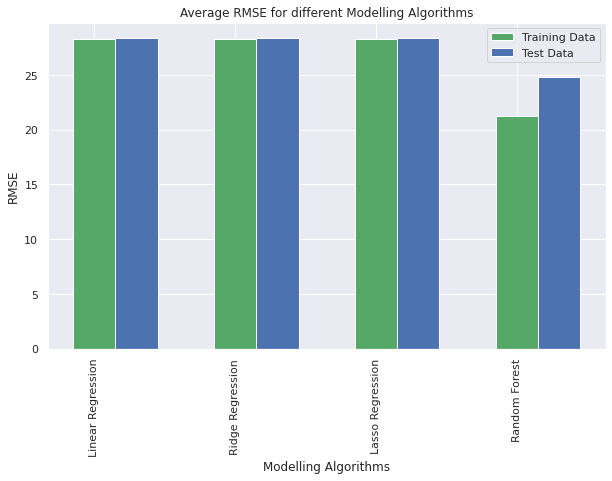

In [ ]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Train RMSE', x=idx, color='g', width=bar_width, label='Training Data')
plt.bar(data=algo_score, height='Test RMSE', x=idx+bar_width, color='b', width=bar_width, label='Test Data')
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('RMSE')
plt.title('Average RMSE for different Modelling Algorithms')
plt.legend()
plt.show()

**Test/Train Time**

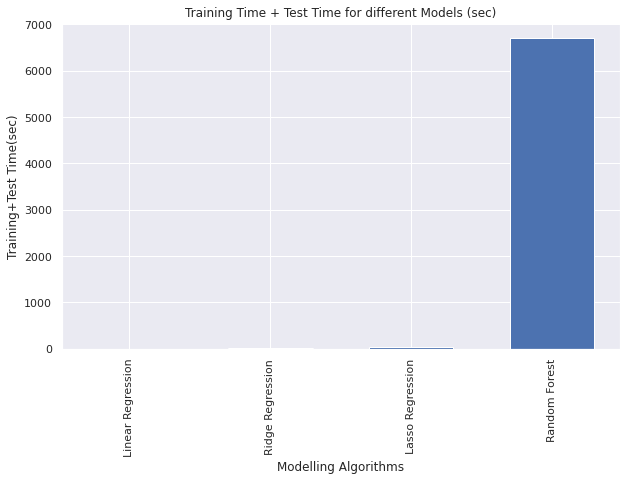

In [ ]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.6
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Training+Test Time(sec)', x=idx, width=bar_width)
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('Training+Test Time(sec)')
plt.title('Training Time + Test Time for different Models (sec)')
#axes.set_yscale('log')
plt.show()